# Sesión 13 - Parte 1 analisis eda automatizado de Series de Tiempo

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

In [3]:
df = pd.read_csv('/workspaces/ml-bootcamp-labs/data/raw/U.S._natural_gas_production.csv')

In [4]:
df

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2018-02-01,97225,9593,1665,565,1350,2634,4809,4652,825,16482,22409,7513,6110,2095,3791,124,7173,4886,549
117,2018-03-01,98278,9542,1646,568,1391,2667,4854,4725,842,16280,22751,7763,6161,2114,3976,122,7448,4882,545
118,2018-04-01,98618,9424,1712,569,1350,2476,4839,4607,837,16368,23097,7836,6134,2245,4037,125,7471,4947,544
119,2018-05-01,99091,9121,1661,568,1348,2496,4740,4820,819,16094,23601,7867,6188,2333,4008,122,7763,4995,547


In [5]:
profile = ProfileReport(
    df=df,
    title="Reporte EDA rápido",
    explorative=True
)

## 

# Sesión 14 - Parte 2 de modelos de Series de Tiempo - Ejercicio con datos de gas

In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error



In [127]:
# Carga de datos
df = pd.read_csv('/workspaces/ml-bootcamp-labs/data/raw/U.S._natural_gas_production.csv')

In [128]:
df.head()

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870


In [129]:
from statsmodels.tsa.arima.model import ARIMA



In [130]:
# Selección de una columna
df['Month']

0      2008-06-01
1      2008-07-01
2      2008-08-01
3      2008-09-01
4      2008-10-01
          ...    
116    2018-02-01
117    2018-03-01
118    2018-04-01
119    2018-05-01
120    2018-06-01
Name: Month, Length: 121, dtype: object

In [131]:
df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [132]:
# Nombre del objeto para seleccionar
# 2 o más columnas
df[ ['Month','U.S.' ] ]

,Month,U.S.
0,2008-06-01,70626
1,2008-07-01,71137
2,2008-08-01,70760
3,2008-09-01,63984
4,2008-10-01,69464
...,...,...
116,2018-02-01,97225
117,2018-03-01,98278
118,2018-04-01,98618
119,2018-05-01,99091


In [133]:
# Renombrando la columna de producción de USA a "Production"
df = df.rename( columns= {'U.S.':'Production'})

In [134]:
df.head()

,Month,Production,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870


In [135]:
# Selección de datos para entrenamiento

df1 = df[['Month','Production']]

In [136]:
df1

,Month,Production
0,2008-06-01,70626
1,2008-07-01,71137
2,2008-08-01,70760
3,2008-09-01,63984
4,2008-10-01,69464
...,...,...
116,2018-02-01,97225
117,2018-03-01,98278
118,2018-04-01,98618
119,2018-05-01,99091


In [137]:
df1['Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 121 entries, 0 to 120
Series name: Month
Non-Null Count  Dtype 
--------------  ----- 
121 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [138]:
df1['Month'] = pd.to_datetime(df1.Month, format = "%Y-%m-%d")

/tmp/ipykernel_11732/4123145146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = pd.to_datetime(df1.Month, format = "%Y-%m-%d")


In [139]:
df1['Month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 121 entries, 0 to 120
Series name: Month
Non-Null Count  Dtype         
--------------  -----         
121 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 KB


In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       121 non-null    datetime64[ns]
 1   Production  121 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


In [141]:
print(df1.columns)

Index(['Month', 'Production'], dtype='object')


In [142]:
df1 = df1.set_index('Month') # Necesitariamos antes hacer un df.sort_values('Month')

In [143]:
df1

,Production
Month,
2008-06-01,70626
2008-07-01,71137
2008-08-01,70760
2008-09-01,63984
2008-10-01,69464
...,...
2018-02-01,97225
2018-03-01,98278
2018-04-01,98618


In [144]:
help(df1.asfreq)

Help on method asfreq in module pandas.core.generic:

asfreq(freq: 'Frequency', method: 'FillnaOptions | None' = None, how: "Literal['start', 'end'] | None" = None, normalize: 'bool_t' = False, fill_value: 'Hashable | None' = None) -> 'Self' method of pandas.core.frame.DataFrame instance
    Convert time series to specified frequency.

    Returns the original data conformed to a new index with the specified
    frequency.

    If the index of this Series/DataFrame is a :class:`~pandas.PeriodIndex`, the new index
    is the result of transforming the original index with
    :meth:`PeriodIndex.asfreq <pandas.PeriodIndex.asfreq>` (so the original index
    will map one-to-one to the new index).

    Otherwise, the new index will be equivalent to ``pd.date_range(start, end,
    freq=freq)`` where ``start`` and ``end`` are, respectively, the first and
    last entries in the original index (see :func:`pandas.date_range`). The
    values corresponding to any timesteps in the new index which

In [68]:
df1 = df1.asfreq('MS')

In [69]:
# Parámetros para primer modelo
#(p,d,q)
order = (2,3,1) # Ventana móvil
horizon = 12 # Ventana de tiempo para validaciones

In [70]:
# Selección por omisión
train = df1[:-horizon] # Dame todos los valores, menos los últimos definidos en horizon (12)
test = df1[-horizon:]

In [71]:
train

,Production
Month,
2008-06-01,70626
2008-07-01,71137
2008-08-01,70760
2008-09-01,63984
2008-10-01,69464
...,...
2017-02-01,89419
2017-03-01,89603
2017-04-01,89389


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 109 entries, 2008-06-01 to 2017-06-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  109 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB


In [76]:
# Generación de modelo
model = ARIMA(train,order=order)
result = model.fit()

In [77]:
pred = result.forecast(steps=horizon)

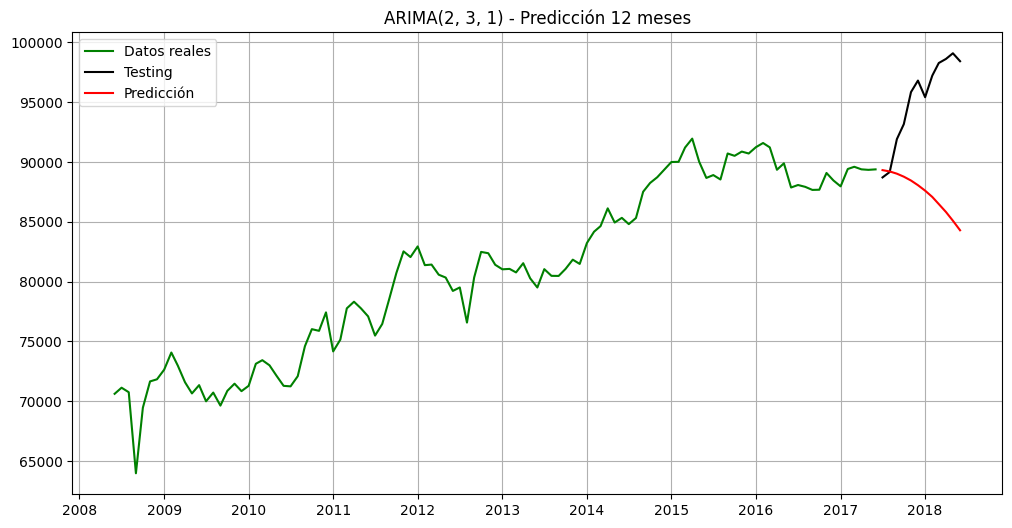

In [78]:
# Crear el lienzo de la figura
plt.figure(figsize=(12,6))
# Plotear los datos reales (train)
plt.plot(train, label='Datos reales',color = 'green')
# Plotear los datos reales (test)
plt.plot(test,label='Testing', color = 'black')
# Plotear las predicciones
plt.plot(pred.index, pred, label='Predicción', color='red')
# Agregar título
plt.title(f'ARIMA{order} - Predicción {horizon} meses')
# Agregar leyenda
plt.legend()
# Agregar cuadrícula
plt.grid()
# Generar imagen
plt.show()

In [79]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [80]:
# Prueba de estacionalidad
adfuller_test = adfuller(df1)

In [81]:
# Valor de Adfuller
adfuller_test[0]

np.float64(-0.4946795322679179)

In [82]:
# P Value
adfuller_test[1]

# El valor nos dice que nuestra serie no es estacionaria

np.float64(0.8930505750541602)

In [83]:
acf(df1)

array([1.        , 0.95908486, 0.9188571 , 0.88093073, 0.83379051,
       0.79934489, 0.7744625 , 0.74304789, 0.71427648, 0.69327062,
       0.67555813, 0.6595148 , 0.64308168, 0.61967837, 0.58903163,
       0.56058766, 0.53172248, 0.50573196, 0.48876225, 0.4709162 ,
       0.45142714])

In [84]:
pacf(df1)

array([ 1.        ,  0.96707723, -0.01448838,  0.01092679, -0.17154161,
        0.17752469,  0.12573667, -0.10051201, -0.03020788,  0.111752  ,
        0.13317432, -0.00876233, -0.08849212, -0.10906923, -0.08066812,
        0.04780111, -0.02781095,  0.01439007,  0.10369989, -0.00462285,
       -0.04585166])

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

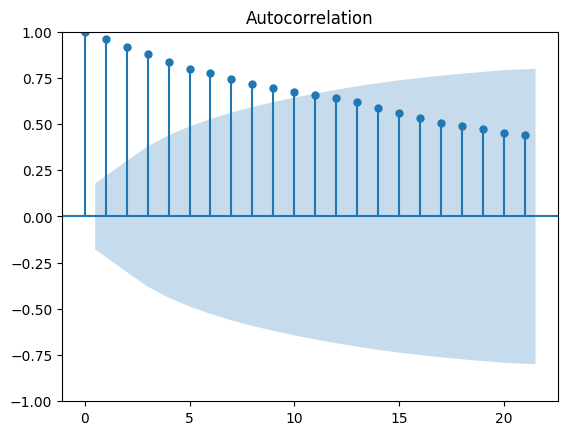

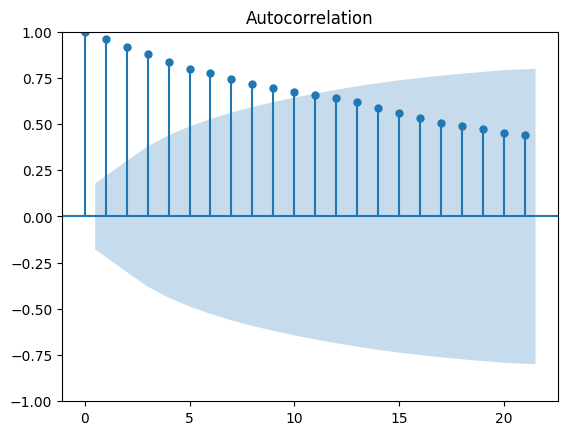

In [86]:
plot_acf(df1)

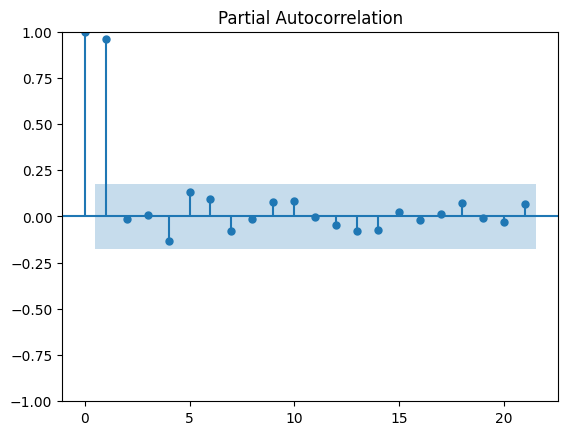

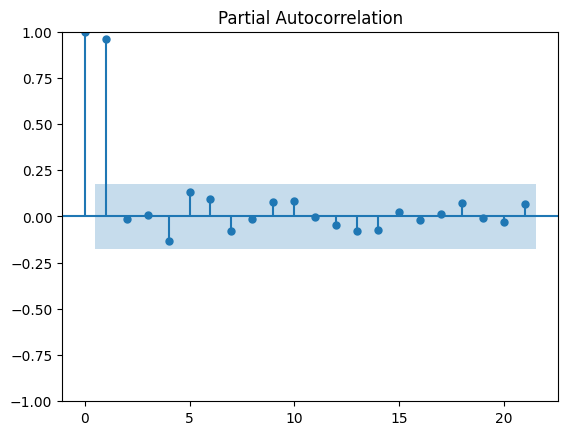

In [87]:
plot_pacf(df1)

In [88]:
train

,Production
Month,
2008-06-01,70626
2008-07-01,71137
2008-08-01,70760
2008-09-01,63984
2008-10-01,69464
...,...
2017-02-01,89419
2017-03-01,89603
2017-04-01,89389


In [89]:
# 0, 1, 4
model = SARIMAX(
    train,
    order=(0,1,4),
    seasonal_order=(0,1,4,horizon)
)

result = model.fit()

/home/codespace/.local/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [94]:
result.predict

<bound method MLEResults.predict of <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x7264856a8350>>

In [95]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Production   No. Observations:                  109
Model:             SARIMAX(0, 1, 4)x(0, 1, 4, 12)   Log Likelihood                -838.812
Date:                            Wed, 06 Aug 2025   AIC                           1695.624
Time:                                    20:23:38   BIC                           1718.704
Sample:                                06-01-2008   HQIC                          1704.953
                                     - 06-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0124      0.037      0.334      0.738      -0.060       0.085
ma.L2         -0.0293      0.091     -0.324      0.746      -0.207       0.148
ma.L3         -0.1146      0.056     -2.050      0.040      -0.224      -0.005
ma.L4          0.0766      0.046      1.676      0.094      -0.013       0.166
ma.S.L12      -0.0858      0.042     -2.066      0.039      -0.167      -0.004
ma.S.L24      -0.0903      0.041     -2.209      0.027      -0.170      -0.010
ma.S.L36      -0.0399      0.041     -0.981      0.327      -0.120       0.040
ma.S.L48      -0.0276      0.042     -0.656      0.512      -0.110       0.055
sigma2      2.204e+06   3.26e+05      6.758      0.000    1.57e+06    2.84e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.99   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.03   Prob(JB):                         0.93
Heteroskedasticity (H):               0.47   Skew:                            -0.07
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
pred = result.forecast(steps=horizon)

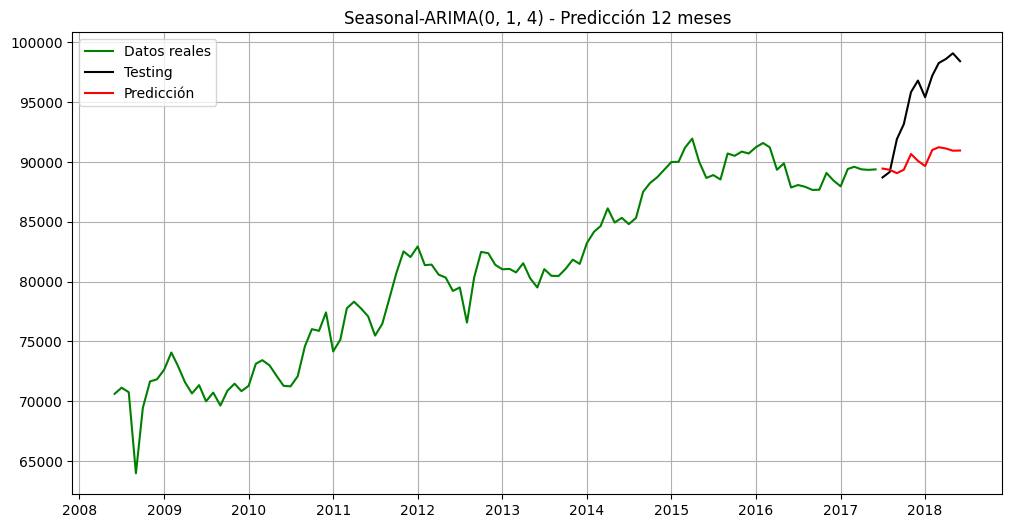

In [97]:
# Crear el lienzo de la figura
plt.figure(figsize=(12,6))
# Plotear los datos reales (train)
plt.plot(train, label='Datos reales',color = 'green')
# Plotear los datos reales (test)
plt.plot(test,label='Testing', color = 'black')
# Plotear las predicciones
plt.plot(pred.index, pred, label='Predicción', color='red')
# Agregar título
plt.title(f'Seasonal-ARIMA{(0,1,4)} - Predicción {horizon} meses')
# Agregar leyenda
plt.legend()
# Agregar cuadrícula
plt.grid()
# Generar imagen
plt.show()

In [98]:
!pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 56.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [prophet]m4/5 [prophet]y]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [99]:
from prophet import Prophet

In [100]:
df2 = df[['Month','Production']]

In [101]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       121 non-null    object
 1   Production  121 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [102]:
df2['Month'] = pd.to_datetime(df2['Month'])

/tmp/ipykernel_11732/3781488833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = pd.to_datetime(df2['Month'])


In [103]:
df2 = df2.rename(columns= { 'Month' :'ds' , 'Production':'y' })
df2

,ds,y
0,2008-06-01,70626
1,2008-07-01,71137
2,2008-08-01,70760
3,2008-09-01,63984
4,2008-10-01,69464
...,...,...
116,2018-02-01,97225
117,2018-03-01,98278
118,2018-04-01,98618
119,2018-05-01,99091


In [104]:
horizon = 12

train = df2[:-horizon]
test = df2[-horizon:]

In [105]:
test

,ds,y
109,2017-07-01,88713
110,2017-08-01,89166
111,2017-09-01,91914
112,2017-10-01,93169
113,2017-11-01,95847
114,2017-12-01,96810
115,2018-01-01,95418
116,2018-02-01,97225
117,2018-03-01,98278
118,2018-04-01,98618


In [106]:
train

,ds,y
0,2008-06-01,70626
1,2008-07-01,71137
2,2008-08-01,70760
3,2008-09-01,63984
4,2008-10-01,69464
...,...,...
104,2017-02-01,89419
105,2017-03-01,89603
106,2017-04-01,89389
107,2017-05-01,89347


In [107]:
model = Prophet()
model.fit(train)

20:24:28 - cmdstanpy - INFO - Chain [1] start processing
20:24:28 - cmdstanpy - INFO - Chain [1] done processing


In [108]:
future = test
future = future.drop(columns=['y'])
future

,ds
109,2017-07-01
110,2017-08-01
111,2017-09-01
112,2017-10-01
113,2017-11-01
114,2017-12-01
115,2018-01-01
116,2018-02-01
117,2018-03-01
118,2018-04-01


In [109]:
future = model.make_future_dataframe(12,freq='MS')
future

,ds
0,2008-06-01
1,2008-07-01
2,2008-08-01
3,2008-09-01
4,2008-10-01
...,...
116,2018-02-01
117,2018-03-01
118,2018-04-01
119,2018-05-01


In [110]:
result = model.predict(future)

In [111]:
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-06-01,70284.878770,68171.202829,71009.940110,70284.878770,70284.878770,-644.225079,-644.225079,-644.225079,-644.225079,-644.225079,-644.225079,0.0,0.0,0.0,69640.653691
1,2008-07-01,70357.499600,68568.452412,71334.465503,70357.499600,70357.499600,-436.114498,-436.114498,-436.114498,-436.114498,-436.114498,-436.114498,0.0,0.0,0.0,69921.385102
2,2008-08-01,70432.541124,67984.661680,70737.025952,70432.541124,70432.541124,-1152.077922,-1152.077922,-1152.077922,-1152.077922,-1152.077922,-1152.077922,0.0,0.0,0.0,69280.463203
3,2008-09-01,70507.582649,66982.285791,69750.409928,70507.582649,70507.582649,-2171.329602,-2171.329602,-2171.329602,-2171.329602,-2171.329602,-2171.329602,0.0,0.0,0.0,68336.253047
4,2008-10-01,70580.203480,69293.327351,72087.162527,70580.203480,70580.203480,92.027683,92.027683,92.027683,92.027683,92.027683,92.027683,0.0,0.0,0.0,70672.231163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2018-02-01,87674.975903,87075.247197,90158.217864,87049.734466,88174.339980,1027.144458,1027.144458,1027.144458,1027.144458,1027.144458,1027.144458,0.0,0.0,0.0,88702.120361
117,2018-03-01,87591.176469,86932.403469,90302.992677,86848.589957,88209.336511,1041.460354,1041.460354,1041.460354,1041.460354,1041.460354,1041.460354,0.0,0.0,0.0,88632.636823
118,2018-04-01,87498.398524,86820.391603,90222.882503,86651.737502,88247.390834,1137.291325,1137.291325,1137.291325,1137.291325,1137.291325,1137.291325,0.0,0.0,0.0,88635.689849
119,2018-05-01,87408.613417,85631.906154,88971.468991,86422.029709,88282.303813,-32.505309,-32.505309,-32.505309,-32.505309,-32.505309,-32.505309,0.0,0.0,0.0,87376.108108


In [112]:
pred = result[['ds','yhat']]

In [113]:
pred = pred.rename(columns = {'ds':'Month','yhat':'Production'})

In [114]:
pred = pred[-horizon:]

In [115]:
pred = pred.set_index('Month')

In [116]:
pred

,Production
Month,
2017-07-01,87309.305842
2017-08-01,86781.342299
2017-09-01,86702.747673
2017-10-01,88194.810962
2017-11-01,88824.680338
2017-12-01,88395.062674
2018-01-01,88206.272123
2018-02-01,88702.120361
2018-03-01,88632.636823


In [117]:
df2

,ds,y
0,2008-06-01,70626
1,2008-07-01,71137
2,2008-08-01,70760
3,2008-09-01,63984
4,2008-10-01,69464
...,...,...
116,2018-02-01,97225
117,2018-03-01,98278
118,2018-04-01,98618
119,2018-05-01,99091


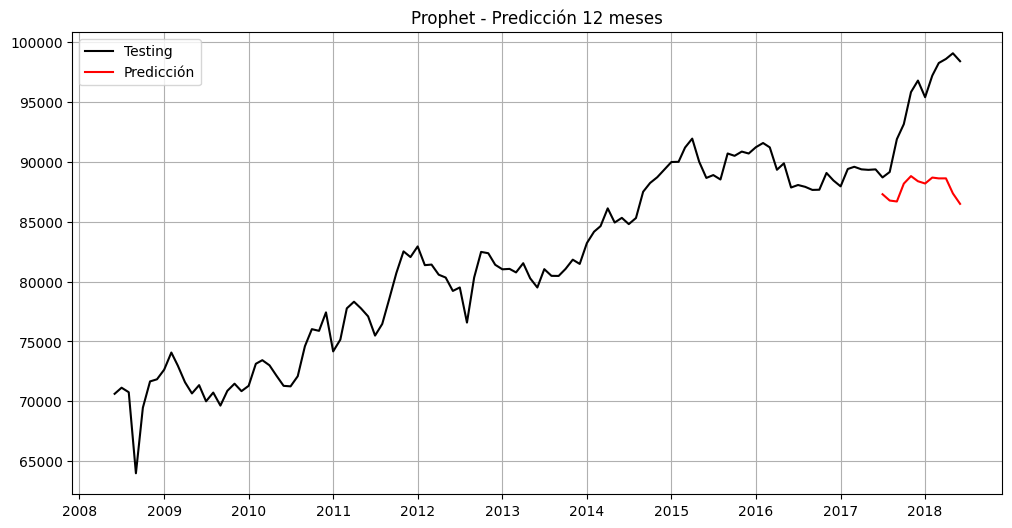

In [118]:
# Crear el lienzo de la figura
plt.figure(figsize=(12,6))
# Plotear los datos reales (train)
#plt.plot(train, label='Datos reales',color = 'green')
# Plotear los datos reales (test)
plt.plot(df2.ds,df2.y,label='Testing', color = 'black')
# Plotear las predicciones
plt.plot(pred.index, pred, label='Predicción', color='red')
# Agregar título
plt.title(f'Prophet - Predicción {horizon} meses')
# Agregar leyenda
plt.legend()
# Agregar cuadrícula
plt.grid()
# Generar imagen
plt.show()